# Extra Credit Assignment - Marvin Rodriguez

## Introduction

The objective of this Jupyter Notebook is to examine a dataset encompassing all nominees throughout the history of the Academy Awards. Our goal is to manipulate the data to extract valuable insights from the results.

To provide context, the Academy Awards, widely known as the Oscars, stands as the oldest film award ceremony in the United States and is overseen by the Academy of Motion Picture Arts and Sciences. Starting in 1929, the Oscars have been a beacon for recognizing excellence in cinematic accomplishments. With a committee boasting over 10,000 voting members, the Oscars hold historical significance, establishing it as one of the most esteemed ceremonies in the film industry. Awards are distributed across various categories, including Best Picture, Best Director, Best Actor, Best Actress, Best Writing, and numerous others.

Let’s start by importing the necessary libraries.

In [1]:
import importlib

# Check if pandas library is installed, install it if not, and then import
if importlib.util.find_spec("pandas") is None:
    !pip install pandas
import pandas as pd

# Check if numpy library is installed, install it if not, and then import
if importlib.util.find_spec("numpy") is None:
    !pip install numpy
import numpy as np

# Check if matplotlib library is installed, install it if not, and then import
if importlib.util.find_spec("matplotlib") is None:
    !pip install matplotlib
import matplotlib.pyplot as plt

***

### Load your Dataset

Now, we'll proceed to load the dataset named "the_oscar_award.csv." This dataset was sourced from Kaggle, provided by the user Raphael Fontes. You can access the dataset through the following link: https://www.kaggle.com/datasets/unanimad/the-oscar-award/.

In [2]:
# Load the Excel file into a DataFrame
oscar_award = pd.read_csv("the_oscar_award.csv")
number_of_rows = len(oscar_award)

print("Display a few rows of your dataset and have a quick view of the data shown. The dataset has", number_of_rows, "rows of data (excludes titles).\n")

# Display the first few rows of the DataFrame
print(oscar_award.head())

print("\nHere's some additional information about the Dataset:\n")

# Display detailed information about the DataFrame
print(oscar_award.info())

Display a few rows of your dataset and have a quick view of the data shown. The dataset has 10765 rows of data (excludes titles).

   year_film  year_ceremony  ceremony category                 name  \
0       1927           1928         1    ACTOR  Richard Barthelmess   
1       1927           1928         1    ACTOR        Emil Jannings   
2       1927           1928         1  ACTRESS       Louise Dresser   
3       1927           1928         1  ACTRESS         Janet Gaynor   
4       1927           1928         1  ACTRESS       Gloria Swanson   

               film  winner  
0         The Noose   False  
1  The Last Command    True  
2   A Ship Comes In   False  
3        7th Heaven    True  
4    Sadie Thompson   False  

Here's some additional information about the Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10765 entries, 0 to 10764
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year_fi

This dataset has 7 columns: “year_film”, “year_ceremony”, “ceremony”, “category”, “name”, “film”, “winner”. A brief description of each category is as follows:
- year_film: The year the film was released in theaters. (Int value)
- year_ceremony: The year the Awards ceremony took place. (Int value)
- ceremony: Number of ceremony. (Int value)
- category: The category for which the film/person was nominated. (String value)
- name: The name of the people nominated. (String value)
- film: The name of the film that was nominated. (String value)
- winner: Indicates if the nominee won the award. (Boolean value)

To narrow down our analysis, we want to only focus on some categories for a specified time frame. The script can be modified to filter for your desired categories throughout different years.

For this Notebook we want to focus on the timeframe from the year 2000 to 2020.

In [3]:
# Filter the DataFrame for the desired time frame (2000 to 2020)
filtered_year_oscar_award = oscar_award[(oscar_award['year_film'] >= 2000) & (oscar_award['year_film'] <= 2020)]
filtered_year_oscar_award = filtered_year_oscar_award.reset_index(drop=True)

# Display the first few rows of the filtered DataFrame
filtered_year_oscar_award.head()

,year_film,year_ceremony,ceremony,category,name,film,winner
0,2000,2001,73,ACTOR IN A LEADING ROLE,Javier Bardem,Before Night Falls,False
1,2000,2001,73,ACTOR IN A LEADING ROLE,Russell Crowe,Gladiator,True
2,2000,2001,73,ACTOR IN A LEADING ROLE,Tom Hanks,Cast Away,False
3,2000,2001,73,ACTOR IN A LEADING ROLE,Ed Harris,Pollock,False
4,2000,2001,73,ACTOR IN A LEADING ROLE,Geoffrey Rush,Quills,False


***

### Filter and clean your Dataset

During the preliminary analysis, we identified 115 unique categories in the dataset, indicating discrepancies in the naming of categories over the years. To address this, we have manually selected and focused on seven main categories for evaluation. These categories are: Best Actor, Best Actress, Best Director, Best Supporting Actor, Best Supporting Actress, Original Screenplay, and Adapted Screenplay. This refined selection allows us to concentrate on **key award categories** for a more targeted analysis.

Upon inspection, we observed variations in the naming conventions for the Original Screenplay and Adapted Screenplay categories throughout the years. These variations exist not only in recent years but also date back to 1950 and earlier. To address this, we have identified and documented all the different naming conventions used since 1927 for our seven categories. Consequently, a DataFrame named `category_to_type` has been generated, mapping each naming convention to its corresponding category type.

This DataFrame is sorted by category type for better organization and reference.

In [4]:
#Create a data frame to account for all the name variations since 1927
category_to_type_data = {
    "category": [
        "ACTOR", "ACTOR IN A LEADING ROLE", "ACTOR IN A SUPPORTING ROLE",
        "ACTRESS", "ACTRESS IN A LEADING ROLE", "ACTRESS IN A SUPPORTING ROLE",
        "DIRECTING", "DIRECTING (Comedy Picture)", "DIRECTING (Dramatic Picture)",
        "WRITING", "WRITING (Adaptation)", "WRITING (Adapted Screenplay)",
        "WRITING (Motion Picture Story)", "WRITING (Original Motion Picture Story)",
        "WRITING (Original Screenplay)", "WRITING (Original Story)",
        "WRITING (Screenplay Adapted from Other Material)",
        "WRITING (Screenplay Based on Material from Another Medium)",
        "WRITING (Screenplay Based on Material Previously Produced or Published)",
        "WRITING (Screenplay Written Directly for the Screen)",
        "WRITING (Screenplay Written Directly for the Screen--based on factual material or on story material not previously published or produced)",
        "WRITING (Screenplay)", "WRITING (Screenplay--Adapted)",
        "WRITING (Screenplay--based on material from another medium)",
        "WRITING (Screenplay--Original)", "WRITING (Story and Screenplay)",
        "WRITING (Story and Screenplay--based on factual material or material not previously published or produced)",
        "WRITING (Story and Screenplay--based on material not previously published or produced)",
        "WRITING (Story and Screenplay--written directly for the screen)"
    ],
    "type": [
        "Lead Actor", "Lead Actor", "Supporting Actor",
        "Lead Actress", "Lead Actress", "Supporting Actress",
        "Director", "Director", "Director",
        "Writer Adaptation", "Writer Adaptation", "Writer Adaptation",
        "Writer Original", "Writer Original", "Writer Original", "Writer Original",
        "Writer Adaptation", "Writer Adaptation", "Writer Adaptation",
        "Writer Original", "Writer Original",
        "Writer Adaptation", "Writer Adaptation",
        "Writer Adaptation", "Writer Original", "Writer Original", "Writer Original",
        "Writer Original", "Writer Original"
    ]
}

category_to_type = pd.DataFrame(category_to_type_data)

# Sort the DataFrame by the 'type' column
category_to_type = category_to_type.sort_values(by='type')
category_to_type = category_to_type.reset_index(drop=True)

# Display the DataFrame
print(category_to_type)

                                             category                type
0                                           DIRECTING            Director
1                          DIRECTING (Comedy Picture)            Director
2                        DIRECTING (Dramatic Picture)            Director
3                                               ACTOR          Lead Actor
4                             ACTOR IN A LEADING ROLE          Lead Actor
5                                             ACTRESS        Lead Actress
6                           ACTRESS IN A LEADING ROLE        Lead Actress
7                          ACTOR IN A SUPPORTING ROLE    Supporting Actor
8                        ACTRESS IN A SUPPORTING ROLE  Supporting Actress
9   WRITING (Screenplay Based on Material Previous...   Writer Adaptation
10  WRITING (Screenplay Based on Material from Ano...   Writer Adaptation
11   WRITING (Screenplay Adapted from Other Material)   Writer Adaptation
12  WRITING (Screenplay--based on mate

Now using the `category_to_type` DataFrame we can filter our `oscar_award` dataset.

In [5]:
# Use merge to filter 'filtered_year_oscar_award'
filtered_categories_oscar_award = pd.merge(
    filtered_year_oscar_award, category_to_type, how='left', left_on='category', right_on='category'
)
filtered_categories_oscar_award = filtered_categories_oscar_award.dropna(subset=['type'])
filtered_categories_oscar_award = filtered_categories_oscar_award.reset_index(drop=True)

# Display the Filtered Categories DataFrame information
print(filtered_categories_oscar_award.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year_film      735 non-null    int64 
 1   year_ceremony  735 non-null    int64 
 2   ceremony       735 non-null    int64 
 3   category       735 non-null    object
 4   name           735 non-null    object
 5   film           735 non-null    object
 6   winner         735 non-null    bool  
 7   type           735 non-null    object
dtypes: bool(1), int64(3), object(4)
memory usage: 41.0+ KB
None


Now that we have filtered the dataset based on the selected categories and time frame, we can proceed to calculate the number of nominations granted within this specified period. 

Following this, we'll determine the count of unique nominees by considering each nominee only once for our analysis. This step is crucial in understanding the breadth and diversity of talent recognized by the Academy Awards during the chosen time frame.

In [6]:
# Nomination Count in the selected time frame using the filtered categories
nomination_count = len(filtered_categories_oscar_award)

# Number of unique Nominees (count each name only once)
unique_nominee_count = filtered_categories_oscar_award['name'].nunique()

# Display the results
print("Nomination Count (Selected time frame using the filtered categories):", nomination_count)
print("Unique Nominee Count (Count each name only once):", unique_nominee_count)

Nomination Count (Selected time frame using the filtered categories): 735
Unique Nominee Count (Count each name only once): 519


To accomplish this, we can create a DataFrame that counts the number of nominations each person obtained. Next, we'll determine how many individuals received one, two, three, and so on nominations, up to a maximum of ten. 

This analysis will provide insights into the distribution of nominations among individuals and highlight the diversity of nominees in terms of the number of recognitions they received.

In [7]:
# Calculate the nomination counts for each nominee
name_counts = filtered_categories_oscar_award['name'].value_counts()
print("Name Counts:")
print(name_counts)

# Initialize a dictionary to store the counts for different numbers of nominations
nomination_counts = {i: sum(name_counts == i) for i in range(1, 11)}

# Create a DataFrame with the counts
nomination_table = pd.DataFrame(list(nomination_counts.items()), columns=['nominations', 'count'])

# Find the person with the most nominations
most_nominated_person_overall = name_counts.idxmax()
most_nominations_overall_count = name_counts.max()

# Print the information
print(f"\nThe person with the most nominations is {most_nominated_person_overall} with a count of {most_nominations_overall_count}.")

# Display the DataFrame
print("\nNomination Table:")
print(nomination_table)

Name Counts:
name
Meryl Streep               9
Martin Scorsese            6
Amy Adams                  6
Cate Blanchett             6
Leonardo DiCaprio          5
                          ..
Ellen Page                 1
Julie Christie             1
Hal Holbrook               1
Written by Peter Morgan    1
Written by Aaron Sorkin    1
Name: count, Length: 519, dtype: int64

The person with the most nominations is Meryl Streep with a count of 9.

Nomination Table:
   nominations  count
0            1    391
1            2     78
2            3     27
3            4     15
4            5      4
5            6      3
6            7      0
7            8      0
8            9      1
9           10      0


Generate a DataFrame exclusively displaying the winners for each category within the specified time frame. This will provide insights into the total number of awards presented during this period.

In [8]:
# Calculate the amount of awards given from the filtered_categories_oscar_award DataFrame
awards_given_in_timeframe = filtered_categories_oscar_award[filtered_categories_oscar_award['winner'] == True]
awards_given_in_timeframe = awards_given_in_timeframe.reset_index(drop=True)

# Display the Awards given DataFrame information
print(awards_given_in_timeframe.info())

# Display the results
print("\nThe number of Academy Awards given during this timeframe was:", len(awards_given_in_timeframe))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year_film      147 non-null    int64 
 1   year_ceremony  147 non-null    int64 
 2   ceremony       147 non-null    int64 
 3   category       147 non-null    object
 4   name           147 non-null    object
 5   film           147 non-null    object
 6   winner         147 non-null    bool  
 7   type           147 non-null    object
dtypes: bool(1), int64(3), object(4)
memory usage: 8.3+ KB
None

The number of Academy Awards given during this timeframe was: 147


***

## Category breakdown

Now, we will generate new datasets, each exclusively including the winners for a specific category. This process will be repeated for each category individually, facilitating further analysis if needed.

### Lead Actor

The **winners** for the Lead Actor category in our selected timeframe are the following:

In [9]:
# Filter for winners in the "Lead Actor" category
actor_leading_role_winners = filtered_categories_oscar_award[
    (filtered_categories_oscar_award['type'] == 'Lead Actor') & 
    (filtered_categories_oscar_award['winner'] == True)]
actor_leading_role_winners = actor_leading_role_winners.reset_index(drop=True)

# Display the DataFrame with a few categories
print(actor_leading_role_winners[['name', 'year_film', 'film']], "\n")

# Group by 'name' and count the wins
leading_actor_win_count = actor_leading_role_winners.groupby('name')['winner'].sum().reset_index(name='wins')
leading_actor_win_count.sort_values(by='wins', ascending = False, inplace = True)
print(leading_actor_win_count,"\n")

# Check if there are multi-time winners and print the statement
if (any(leading_actor_win_count['wins'] > 1)):
    print("The only actor(s) who won on more than one occasion in the 'Lead Actor' category in the specified time frame:",
          ", ".join(leading_actor_win_count.loc[leading_actor_win_count['wins'] > 1, 'name']))
else:
    print("No actor has won more than once in the 'Lead Actor' category in the specified time frame.")

                      name  year_film                       film
0            Russell Crowe       2000                  Gladiator
1        Denzel Washington       2001               Training Day
2             Adrien Brody       2002                The Pianist
3                Sean Penn       2003               Mystic River
4               Jamie Foxx       2004                        Ray
5   Philip Seymour Hoffman       2005                     Capote
6          Forest Whitaker       2006  The Last King of Scotland
7         Daniel Day-Lewis       2007        There Will Be Blood
8                Sean Penn       2008                       Milk
9             Jeff Bridges       2009                Crazy Heart
10             Colin Firth       2010          The King's Speech
11           Jean Dujardin       2011                 The Artist
12        Daniel Day-Lewis       2012                    Lincoln
13     Matthew McConaughey       2013         Dallas Buyers Club
14          Eddie Redmayn

### Supporting Actor

The **winners** for the Supporting Actor category in our selected timeframe are the following:

In [10]:
#ACTOR IN A SUPPORTING ROLE
actor_supporting_role_winners = filtered_categories_oscar_award[
    (filtered_categories_oscar_award['type'] == 'Supporting Actor') & 
    (filtered_categories_oscar_award['winner'] == True)]
actor_supporting_role_winners = actor_supporting_role_winners.reset_index(drop=True)

# Display the DataFrame
print(actor_supporting_role_winners[['name', 'year_film', 'film']], "\n")

# Group by 'name' and count the wins
supporting_actor_win_count = actor_supporting_role_winners.groupby('name')['winner'].sum().reset_index(name='wins')
supporting_actor_win_count.sort_values(by='wins', ascending=False, inplace=True)
print(supporting_actor_win_count, "\n")

# Check if there are multi-time winners and print the statement
if any(supporting_actor_win_count['wins'] > 1):
    print("The only actor(s) who won on more than one occasion in the 'Supporting Actor' category in the specified time frame:",
          ", ".join(supporting_actor_win_count.loc[supporting_actor_win_count['wins'] > 1, 'name']))
else:
    print("No actor has won more than once in the 'Supporting Actor' category in the specified time frame.")

                   name  year_film                                       film
0      Benicio Del Toro       2000                                    Traffic
1         Jim Broadbent       2001                                       Iris
2          Chris Cooper       2002                                 Adaptation
3           Tim Robbins       2003                               Mystic River
4        Morgan Freeman       2004                        Million Dollar Baby
5        George Clooney       2005                                    Syriana
6            Alan Arkin       2006                       Little Miss Sunshine
7         Javier Bardem       2007                     No Country for Old Men
8          Heath Ledger       2008                            The Dark Knight
9       Christoph Waltz       2009                       Inglourious Basterds
10       Christian Bale       2010                                The Fighter
11  Christopher Plummer       2011                              

### Lead Actress

The **winners** for the Lead Actress category in our selected timeframe are the following:

In [11]:
#ACTRESS IN A LEADING ROLE
actress_leading_role_winners = filtered_categories_oscar_award[
    (filtered_categories_oscar_award['type'] == 'Lead Actress') & 
    (filtered_categories_oscar_award['winner'] == True)]
actress_leading_role_winners = actress_leading_role_winners.reset_index(drop=True)

# Display the DataFrame with a few categories
print(actress_leading_role_winners[['name', 'year_film', 'film']], "\n")

# Group by 'name' and count the wins
leading_actress_win_count = actress_leading_role_winners.groupby('name')['winner'].sum().reset_index(name='wins')
leading_actress_win_count.sort_values(by='wins', ascending=False, inplace=True)
print(leading_actress_win_count, "\n")

# Check if there are multi-time winners and print the statement
if any(leading_actress_win_count['wins'] > 1):
    print("The only actress(es) who won on more than one occasion in the 'Lead Actress' category in the specified time frame:",
          ", ".join(leading_actress_win_count.loc[leading_actress_win_count['wins'] > 1, 'name']))
else:
    print("No actress has won more than once in the 'Lead Actress' category in the specified time frame.")

                 name  year_film                                       film
0       Julia Roberts       2000                            Erin Brockovich
1         Halle Berry       2001                             Monster's Ball
2       Nicole Kidman       2002                                  The Hours
3     Charlize Theron       2003                                    Monster
4        Hilary Swank       2004                        Million Dollar Baby
5   Reese Witherspoon       2005                              Walk the Line
6        Helen Mirren       2006                                  The Queen
7    Marion Cotillard       2007                             La Vie en Rose
8        Kate Winslet       2008                                 The Reader
9      Sandra Bullock       2009                             The Blind Side
10    Natalie Portman       2010                                 Black Swan
11       Meryl Streep       2011                              The Iron Lady
12  Jennifer

### Supporting Actress

The **winners** for the Supporting Actress category in our selected timeframe are the following:

In [12]:
#ACTRESS IN A SUPPORTING ROLE
actress_supporting_role_winners = filtered_categories_oscar_award[
    (filtered_categories_oscar_award['type'] == 'Supporting Actress') & 
    (filtered_categories_oscar_award['winner'] == True)]
actress_supporting_role_winners = actress_supporting_role_winners.reset_index(drop=True)

# Display the DataFrame with a few categories
print(actress_supporting_role_winners[['name', 'year_film', 'film']], "\n")

# Group by 'name' and count the wins
supporting_actress_win_count = actress_supporting_role_winners.groupby('name')['winner'].sum().reset_index(name='wins')
supporting_actress_win_count.sort_values(by='wins', ascending=False, inplace=True)
print(supporting_actress_win_count, "\n")

# Check if there are multi-time winners and print the statement
if any(supporting_actress_win_count['wins'] > 1):
    print("The only actress(es) who won on more than one occasion in the 'Supporting Actress' category in the specified time frame:",
          ", ".join(supporting_actress_win_count.loc[supporting_actress_win_count['wins'] > 1, 'name']))
else:
    print("No actress has won more than once in the 'Supporting Actress' category in the specified time frame.")

                    name  year_film  \
0      Marcia Gay Harden       2000   
1      Jennifer Connelly       2001   
2   Catherine Zeta-Jones       2002   
3        Renée Zellweger       2003   
4         Cate Blanchett       2004   
5           Rachel Weisz       2005   
6        Jennifer Hudson       2006   
7          Tilda Swinton       2007   
8          Penélope Cruz       2008   
9               Mo'Nique       2009   
10           Melissa Leo       2010   
11       Octavia Spencer       2011   
12         Anne Hathaway       2012   
13        Lupita Nyong'o       2013   
14     Patricia Arquette       2014   
15       Alicia Vikander       2015   
16           Viola Davis       2016   
17        Allison Janney       2017   
18           Regina King       2018   
19            Laura Dern       2019   
20         Yuh-Jung Youn       2020   

                                               film  
0                                           Pollock  
1                                

### Director

The **winners** for the Director category in our selected timeframe are the following:

In [13]:
#DIRECTING
director_winners = filtered_categories_oscar_award[
    (filtered_categories_oscar_award['type'] == 'Director') & 
    (filtered_categories_oscar_award['winner'] == True)]
director_winners = director_winners.reset_index(drop=True)

# Display the DataFrame with a few categories
print(director_winners[['name', 'year_film', 'film']], "\n")
director_winners['name'] = director_winners['name'].str.replace(' and ', ', ').str.split(', ')
director_winners = director_winners.explode('name')

# Group by 'name' and count the wins
director_win_count = director_winners.groupby('name')['winner'].sum().reset_index(name='wins')
director_win_count['name'] = director_win_count['name'].str.strip()  # Trim whitespaces
director_win_count.sort_values(by='wins', ascending=False, inplace=True)
print(director_win_count, "\n")

# Check if there are multi-time winners and print the statement
if any(director_win_count['wins'] > 1):
    print("The only director(s) who won on more than one occasion in the 'Director' category in the specified time frame:",
          ", ".join(director_win_count.loc[director_win_count['wins'] > 1, 'name']))
else:
    print("No director has won more than once in the 'Director' category in the specified time frame.")

                           name  year_film  \
0             Steven Soderbergh       2000   
1                    Ron Howard       2001   
2                Roman Polanski       2002   
3                 Peter Jackson       2003   
4                Clint Eastwood       2004   
5                       Ang Lee       2005   
6               Martin Scorsese       2006   
7      Joel Coen and Ethan Coen       2007   
8                   Danny Boyle       2008   
9               Kathryn Bigelow       2009   
10                   Tom Hooper       2010   
11          Michel Hazanavicius       2011   
12                      Ang Lee       2012   
13               Alfonso Cuarón       2013   
14  Alejandro González Iñárritu       2014   
15  Alejandro González Iñárritu       2015   
16              Damien Chazelle       2016   
17           Guillermo del Toro       2017   
18               Alfonso Cuarón       2018   
19                 Bong Joon Ho       2019   
20                   Chloé Zhao   

### Writing (Adapted Screenplay)

The **winners** for the Writing (Adapted Screenplay) category in our selected timeframe are the following:

In [14]:
# WRITER (Adapted Screenplay)
writer_adapted_winners = filtered_categories_oscar_award[
    (filtered_categories_oscar_award['type'] == 'Writer Adaptation') & 
    (filtered_categories_oscar_award['winner'] == True)]
writer_adapted_winners = writer_adapted_winners.reset_index(drop=True)

# Display the DataFrame with a few categories
print(writer_adapted_winners[['name', 'year_film', 'film']], "\n")

# Replace patterns with commas and separate rows
writer_adapted_winners['name'] = writer_adapted_winners['name'].replace({
    "^(Story by|Screenplay by|Written by|Written for the screen by|Stories by)|[;\\s]*Screenplay by|[;\\s]*Story by|[;\\s]*[&,]|([;,]|\\s+and\\s+)|\\s+$": ", "
}, regex=True)

# Split names and separate rows
writer_adapted_winners['name'] = writer_adapted_winners['name'].str.split(', |\\s+and\\s+|\\s+&\\s+|,\\s*')

# Explode the lists to separate rows for each name
writer_adapted_winners_exploded = writer_adapted_winners.explode('name')

# Filter out empty and all-whitespace names
writer_adapted_winners_exploded = writer_adapted_winners_exploded[~writer_adapted_winners_exploded['name'].str.match('^\\s*$')]

# Trim whitespaces
writer_adapted_winners_exploded['name'] = writer_adapted_winners_exploded['name'].str.strip()

# Group by 'name' and count the wins
writer_adapted_win_count = writer_adapted_winners_exploded.groupby('name')['winner'].sum().reset_index(name='wins')
writer_adapted_win_count.sort_values(by='wins', ascending=False, inplace=True)
print(writer_adapted_win_count, "\n")

# Check if there are multi-time winners and print the statement
if any(writer_adapted_win_count['wins'] > 1):
    print("The only writer(s) who won on more than one occasion in the 'Adapted Screenplay' category in the specified time frame:",
          ", ".join(writer_adapted_win_count.loc[writer_adapted_win_count['wins'] > 1, 'name']))
else:
    print("No writer has won more than once in the 'Adapted Screenplay' category in the specified time frame.")

                                                 name  year_film  \
0                        Screenplay by Stephen Gaghan       2000   
1                           Written by Akiva Goldsman       2001   
2                        Screenplay by Ronald Harwood       2002   
3   Screenplay by Fran Walsh, Philippa Boyens & Pe...       2003   
4          Screenplay by Alexander Payne & Jim Taylor       2004   
5         Screenplay by Larry McMurtry & Diana Ossana       2005   
6                       Screenplay by William Monahan       2006   
7    Written for the screen by Joel Coen & Ethan Coen       2007   
8                         Screenplay by Simon Beaufoy       2008   
9                     Screenplay by Geoffrey Fletcher       2009   
10                         Screenplay by Aaron Sorkin       2010   
11  Screenplay by Alexander Payne and Nat Faxon & ...       2011   
12                         Screenplay by Chris Terrio       2012   
13                          Screenplay by John R

### Writing (Original Screenplay)

The **winners** for the Writing (Original Screenplay) category in our selected timeframe are the following:

In [15]:
#WRITING (Original Screenplay)
writing_original_winners = filtered_categories_oscar_award[
    (filtered_categories_oscar_award['type'] == 'Writer Original') & 
    (filtered_categories_oscar_award['winner'] == True)]
writing_original_winners = writing_original_winners.reset_index(drop=True)

# Display the DataFrame with a few categories
print(writing_original_winners[['name', 'year_film', 'film']], "\n")

# Replace patterns with commas and separate rows
writing_original_winners['name'] = writing_original_winners['name'].replace({
    "^(Story by|Screenplay by|Written by|Written for the screen by|Stories by)|[;\\s]*Screenplay by|[;\\s]*Story by|[;\\s]*[&,]|([;,]|\\s+and\\s+)|\\s+$": ", "
}, regex=True)

# Split names and separate rows
writing_original_winners['name'] = writing_original_winners['name'].str.split(', |\\s+and\\s+|\\s+&\\s+|,\\s*')

# Explode the lists to separate rows for each name
writing_original_winners_exploded = writing_original_winners.explode('name')

# Filter out empty and all-whitespace names
writing_original_winners_exploded = writing_original_winners_exploded[~writing_original_winners_exploded['name'].str.match('^\\s*$')]

# Trim whitespaces
writing_original_winners_exploded['name'] = writing_original_winners_exploded['name'].str.strip()

# Group by 'name' and count the wins
writer_original_win_count = writing_original_winners_exploded.groupby('name')['winner'].sum().reset_index(name='wins')
writer_original_win_count.sort_values(by='wins', ascending=False, inplace=True)
print(writer_original_win_count, '\n')

# Check if there are multi-time winners and print the statement
if any(writer_original_win_count['wins'] > 1):
    print("The only writer(s) who won on more than one occasion in the 'Original Screenplay' category in the specified time frame:",
          ", ".join(writer_original_win_count.loc[writer_original_win_count['wins'] > 1, 'name']))
else:
    print("No writer has won more than once in the 'Original Screenplay' category in the specified time frame.")

                                                 name  year_film  \
0                            Written by Cameron Crowe       2000   
1                          Written by Julian Fellowes       2001   
2                          Written by Pedro Almodóvar       2002   
3                            Written by Sofia Coppola       2003   
4   Screenplay by Charlie Kaufman; Story by Charli...       2004   
5   Screenplay by Paul Haggis & Bobby Moresco; Sto...       2005   
6                            Written by Michael Arndt       2006   
7                              Written by Diablo Cody       2007   
8                       Written by Dustin Lance Black       2008   
9                                Written by Mark Boal       2009   
10                        Screenplay by David Seidler       2010   
11                             Written by Woody Allen       2011   
12                       Written by Quentin Tarantino       2012   
13                             Written by Spike 

### Winners breakdown

If you merge all the previously generated tables, you'll obtain a tibble that displays all the winners along with their respective win counts. 

Additionally, it highlights individuals who secured more than one award within this designated timeframe.

In [16]:
# Concatenate DataFrames vertically
winners_total = pd.concat([
    leading_actor_win_count, supporting_actor_win_count, leading_actress_win_count,
    supporting_actress_win_count, director_win_count, writer_adapted_win_count, writer_original_win_count
], ignore_index=True)

# Trim whitespaces
winners_total['name'] = winners_total['name'].str.strip()

# Group by 'name' and count the wins
winners_total = winners_total.groupby('name')['wins'].sum().reset_index(name='wins')

# Sort by wins in descending order and then by name
winners_total.sort_values(by=['wins', 'name'], ascending=[False, True], inplace=True)
winners_total = winners_total.reset_index(drop=True)

# Print the total number of winners
winners_count = winners_total.shape[0]

print(f'The total number of winners was: {winners_count}.\n')

# Get the total number of winners
most_wins_overall = winners_total[winners_total['wins'] == winners_total['wins'].max()]
print("People with the most wins:")
print(most_wins_overall)

The total number of winners was: 155.

People with the most wins:
                          name  wins
0  Alejandro González Iñárritu     3
1                 Bong Joon Ho     3


Create a table containing individuals who secured **more than one award** within the specified time frame.

In [17]:
# Filter for multi-time winners and create a copy
multi_time_winners = winners_total[winners_total['wins'] > 1].copy()

# Sort by wins in descending order and then by name
multi_time_winners.sort_values(by=['wins', 'name'], ascending=[False, True], inplace=True)
print(multi_time_winners, "\n")

# Get the total number of multi-time winners
multitime_winners_count = multi_time_winners.shape[0]

# Print the total number of people who won more than one Award
print(f'The total number of multi-time winners was: {multitime_winners_count}.')

                           name  wins
0   Alejandro González Iñárritu     3
1                  Bong Joon Ho     3
2               Alexander Payne     2
3                Alfonso Cuarón     2
4                       Ang Lee     2
5                Cate Blanchett     2
6               Charlie Kaufman     2
7               Christoph Waltz     2
8              Daniel Day-Lewis     2
9                    Ethan Coen     2
10            Frances McDormand     2
11                    Joel Coen     2
12               Mahershala Ali     2
13                  Paul Haggis     2
14                Peter Jackson     2
15              Renée Zellweger     2
16                    Sean Penn     2 

The total number of multi-time winners was: 17.


Create a table containing individuals who won in **multiple categories** within the specified time frame.

In [18]:
# Group by 'name' and count the number of unique categories each winner has won in
multiple_category_winners = awards_given_in_timeframe.groupby('name')['type'].nunique().reset_index(name='unique_categories')

# Filter for winners with more than one unique category
multiple_category_winners = multiple_category_winners[multiple_category_winners['unique_categories'] > 1]
multiple_category_winners = multiple_category_winners.reset_index(drop=True)

print(multiple_category_winners, "\n")

# Get the total number of multiple category winners
multiple_category_winners_count = multiple_category_winners.shape[0]

# Print the total number of people who won on more than one category
print(f'The total number of multiple category winners was: {multiple_category_winners_count}.')

              name  unique_categories
0   Cate Blanchett                  2
1  Renée Zellweger                  2 

The total number of multiple category winners was: 2.


Generate a list of all the nominations received for individuals who **won** Oscars during the specified time period.

In [19]:
# Perform a left join
nominations_for_winners = pd.merge(winners_total, filtered_categories_oscar_award, on='name', how='left')

# Sort the resulting DataFrame
nominations_for_winners.sort_values(by=['name', 'year_film'], inplace=True)
#print(nominations_for_winners)

# Print the summary
print(f"There have been a combined {len(nominations_for_winners)} Oscar nominations for the people who have won an Oscar.")

There have been a combined 281 Oscar nominations for the people who have won an Oscar.


Count the nominations received by individuals **after** winning an Oscar, and **include** the year of their win in the resulting table.

In [20]:
# Drop rows with missing values
nominations_after_win = nominations_for_winners.dropna(subset=['year_film', 'winner'])

# Find the first winning year for each 'name' group
first_win_years = nominations_after_win[nominations_after_win['winner']].groupby('name')['year_film'].min().reset_index()

# Merge the first_win_years DataFrame with nominations_after_win
merged_df = pd.merge(nominations_after_win, first_win_years, on=['name'])

# Filter the DataFrame to include only rows with years greater than or equal to the first win year
nominations_after_win = merged_df[merged_df['year_film_x'] >= merged_df['year_film_y']]

# Drop the redundant column (first_win year)
nominations_after_win = nominations_after_win.drop(columns=['year_film_y'])

# Rename the 'year_film_x' column to 'year_film'
nominations_after_win = nominations_after_win.rename(columns={'year_film_x': 'year_film'})
nominations_after_win = nominations_after_win.sort_values(by=['name', 'year_film', 'winner'], ascending=[True, True, False]).reset_index(drop=True)


# Print the summary
print(f"There have been a combined {len(nominations_after_win)} Oscar nominations for people after they won their first Academy Award (Including their win).")

There have been a combined 167 Oscar nominations for people after they won their first Academy Award (Including their win).


Last but not least, exclude the rows where individuals **won their first** Oscar, showing only the nominations they received after their first win.

In [27]:
# Group by 'name' and count the nominations after they won an Oscar
final_nominations_after_first_win = nominations_after_win.groupby('name').filter(lambda x: len(x) > 1).groupby('name')['year_film'].count().reset_index(name='nomination_count')

# Subtract 1 to get the count excluding their win year
final_nominations_after_first_win['nomination_count'] = final_nominations_after_first_win['nomination_count'] - 1

# Sort by nomination_count in descending order and then by name
final_nominations_after_first_win.sort_values(by=['nomination_count', 'name'], ascending=[False, True], inplace=True)
final_nominations_after_first_win.reset_index(drop=True, inplace=True)

# Some statistics
unique_nominees_after_first_win = final_nominations_after_first_win['name'].nunique()
total_nominations_after_first_win = final_nominations_after_first_win['nomination_count'].sum()
most_nominated_person = final_nominations_after_first_win.loc[final_nominations_after_first_win['nomination_count'].idxmax(), 'name']
most_nominations_count = final_nominations_after_first_win['nomination_count'].max()

print(f"• There were {unique_nominees_after_first_win} people who got Oscar nominations after they won their first Academy Award (excluding their win).")
print(f"• There have been a combined {total_nominations_after_first_win} Oscar nominations for people after they won their first Academy Award (excluding their win).")
print(f"• The person with the most nominations after their first win is {most_nominated_person} with a count of {most_nominations_count}.")


• There were 48 people who got Oscar nominations after they won their first Academy Award (excluding their win).
• There have been a combined 73 Oscar nominations for people after they won their first Academy Award (excluding their win).
• The person with the most nominations after their first win is Cate Blanchett with a count of 5.


### Summary

Here are some ratios obtained from our analysis, which will help us showcase our results.

In [28]:
# Some ratios from our results
winners_ratio = round(winners_count / unique_nominee_count * 100, 2)
nominations_after_win_winner_ratio = round(unique_nominees_after_first_win / winners_count * 100, 2)
nominees_after_win_ratio = round(unique_nominees_after_first_win / unique_nominee_count * 100, 2)
one_nomination_ratio = round(nomination_table['count'].iloc[0] / unique_nominee_count * 100, 2)

print(f"• Winners ratio: {winners_ratio}%")
print(f"• Nominations after win winner ratio: {nominations_after_win_winner_ratio}%")
print(f"• Nominees after win ratio: {nominees_after_win_ratio}%")
print(f"• One nomination ratio: {one_nomination_ratio}%")

• Winners ratio: 29.87%
• Nominations after win winner ratio: 30.97%
• Nominees after win ratio: 9.25%
• One nomination ratio: 75.34%


Finally, here's a brief Summary of the findings we obtained from our analysis.

In [23]:
# Print the summary
print(f"Summary:\n\n"
      f"• The time frame selected for this analysis was from {filtered_year_oscar_award['year_film'].iloc[0]} to {filtered_year_oscar_award['year_film'].iloc[-1]}.\n"
      f"• There were 7 categories evaluated: Best Actor, Best Actress, Best Director, Best Supporting Actor, Best Supporting Actress, Original Screenplay, and Adapted Screenplay.\n"
      f"• Nomination Count (Selected time frame using the filtered categories): {nomination_count}.\n"
      f"• Unique Nominee Count (Count each name only once): {unique_nominee_count}.\n"
      f"• The person with the most nominations is {most_nominated_person_overall} with a count of {most_nominations_overall_count}.\n"
      f"• There were {len(awards_given_in_timeframe)} awards given in the time frame selected.\n"
      f"• The total number of winners was: {winners_count}.\n"
      f"• The total number of multi-time winners was: {multitime_winners_count}.\n"
      f"• The total number of multiple category winners was: {multiple_category_winners_count}.\n"
      f"• People with the most wins: {', '.join(map(str, most_wins_overall['name'].tolist()))}, with a count of {most_wins_overall['wins'].iloc[0]} wins.\n"
      f"• The percentage of Oscar winners with respect to unique nominees is {winners_ratio}%\n"
      f"• The number of individuals with only one nomination in the selected time frame is: {nomination_table['count'].iloc[0]}.\n"
      f"• The percentage of individuals with only one nomination with respect to overall unique nominees is: {one_nomination_ratio}%\n"
      f"• There have been a combined {total_nominations_after_first_win} Oscar nominations for people after they won their first Academy Award (excluding their win).\n"      
      f"• There were {unique_nominees_after_first_win} people who got a nomination AFTER they secured their first win.\n"
      f"• The percentage of people who got a nomination after their first-time win with respect to Oscar winners is {nominations_after_win_winner_ratio}%\n"
      f"• The percentage of people who got a nomination after their first-time win with respect to overall unique nominees is {nominees_after_win_ratio}%\n"
      f"• The person with the most nominations after their first win is {most_nominated_person} with a count of {most_nominations_count}."
)

Summary:

• The time frame selected for this analysis was from 2000 to 2020.
• There were 7 categories evaluated: Best Actor, Best Actress, Best Director, Best Supporting Actor, Best Supporting Actress, Original Screenplay, and Adapted Screenplay.
• Nomination Count (Selected time frame using the filtered categories): 735.
• Unique Nominee Count (Count each name only once): 519.
• The person with the most nominations is Meryl Streep with a count of 9.
• There were 147 awards given in the time frame selected.
• The total number of winners was: 155.
• The total number of multi-time winners was: 17.
• The total number of multiple category winners was: 2.
• People with the most wins: Alejandro González Iñárritu, Bong Joon Ho, with a count of 3 wins.
• The percentage of Oscar winners with respect to unique nominees is 29.87%
• The number of individuals with only one nomination in the selected time frame is: 391.
• The percentage of individuals with only one nomination with respect to overal

### Visuals and graphs

Generate a Pie chart depicting the distribution of distinct winners across each category. The intention is for Lead Actor, Supporting Actor, Lead Actress, and Supporting Actress categories to typically feature a single winner annually, although individuals may secure multiple wins over different years. In contrast, categories such as Director, Original Writing, and Adapted Writing, characterized by collaborative efforts, may exhibit instances of multiple winners within the same year.

A tibble that shows the number of unique winners in each category:

             Category  Count
0       Leading Actor     19
1    Supporting Actor     19
2        Lead Actress     20
3  Supporting Actress     21
4            Director     19
5    Writer (Adapted)     33
6   Writer (Original)     31


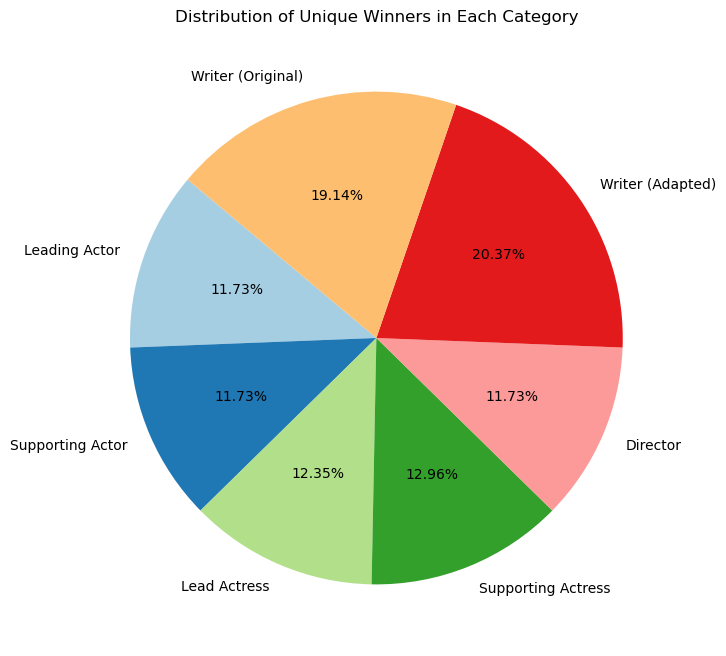

In [24]:
# Store the counts  in variables
leading_actor_count = len(leading_actor_win_count)
supporting_actor_count = len(supporting_actor_win_count)
leading_actress_count = len(leading_actress_win_count)
supporting_actress_count = len(supporting_actress_win_count)
director_count = len(director_win_count)
writer_adapted_count = len(writer_adapted_win_count)
writer_original_count = len(writer_original_win_count)

# Data for the pie chart
counts = [leading_actor_count, supporting_actor_count, leading_actress_count,
          supporting_actress_count, director_count, writer_adapted_count, writer_original_count]
categories = ['Leading Actor', 'Supporting Actor', 'Lead Actress',
              'Supporting Actress', 'Director', 'Writer (Adapted)', 'Writer (Original)']

tibble_unique_winners_categories = pd.DataFrame({'Category': categories, 'Count': counts})
print(f"A tibble that shows the number of unique winners in each category:\n")
print(tibble_unique_winners_categories)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=categories, autopct='%1.2f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Unique Winners in Each Category')

# Show the plot
plt.show()

Generate a Line plot representing the distribution of individuals based on the number of nominations they received, ranging from 1 nomination, to 10 nominations. This visualization may utilize the `nomination_table` established earlier.

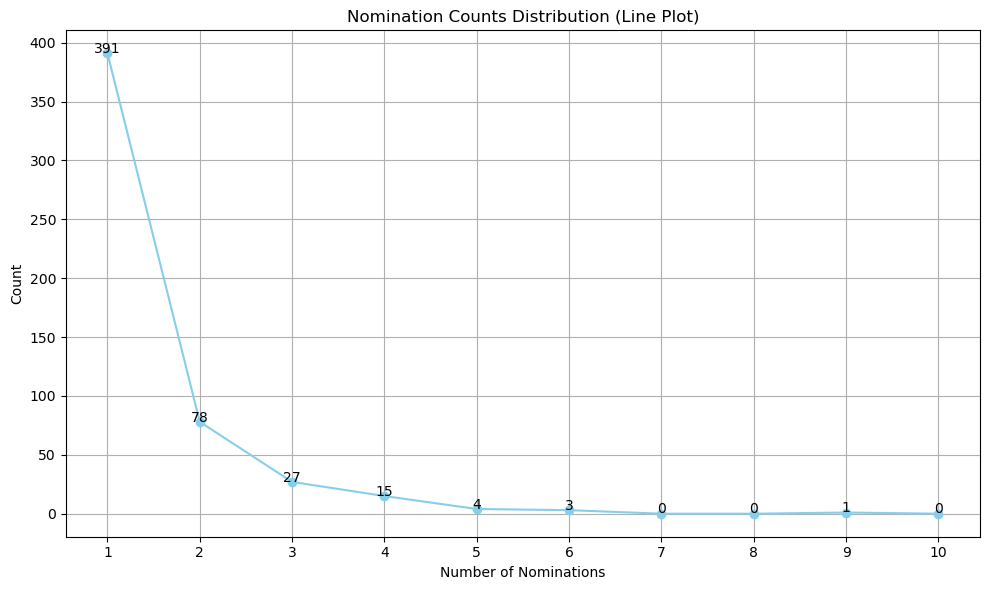

In [25]:
# Create a Line plot
plt.figure(figsize=(10, 6))
plt.plot(nomination_table['nominations'], nomination_table['count'], marker='o', color='skyblue')

# Add count labels above the points
for i, count in enumerate(nomination_table['count']):
    plt.text(nomination_table['nominations'][i], count + 0.2, str(count), ha='center')

# Format your plot
plt.xlabel('Number of Nominations')
plt.ylabel('Count')
plt.title('Nomination Counts Distribution (Line Plot)')
plt.xticks(nomination_table['nominations'])
plt.grid(True)
plt.tight_layout()
plt.show()

***

## Conclusion

This marks the conclusion of the Notebook. By utilizing an extensive dataset that encapsulates the history of the Academy Awards, we extracted valuable insights into the distribution of awards and nominations. While this study provides a concise overview, the dataset holds potential for more in-depth analyses. There are possibilities to explore the distribution of nominations and wins based on gender, ethnicity, or nationality. Additionally, we could analyze other datasets that provide information on the genre and runtime of all the movies. Another avenue is to find datasets on box office returns and merge them with this dataset, unlocking a new range of insights.

I hope you found this exploration engaging, and I appreciate the opportunity to share these findings with you!

Thank you!

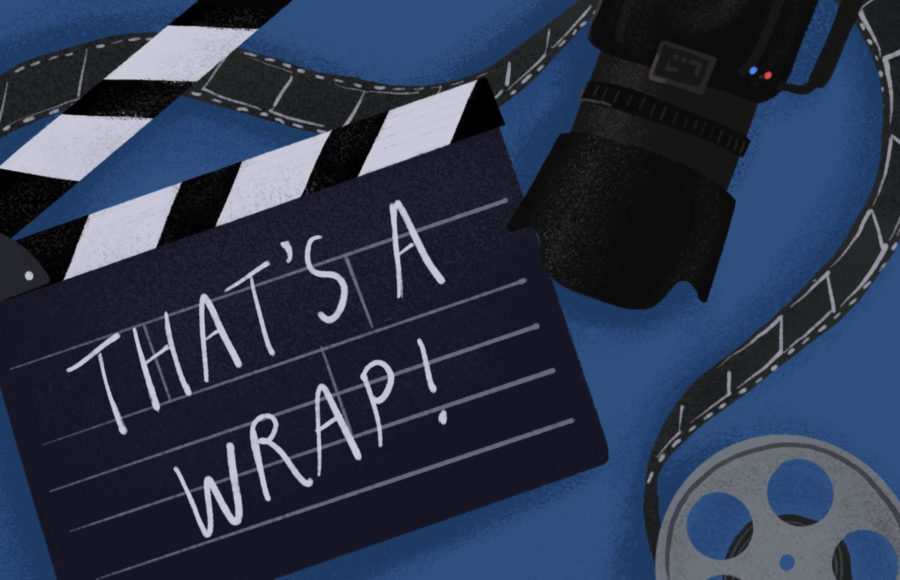

In [26]:
from IPython.display import Image, display

# Display the image
display(Image(filename='thats a wrap.jpeg'))